In [18]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [19]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [20]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_all.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_all.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_all.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_all.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 42), (4499, 1), (4233, 43), (4233, 2))

In [22]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [23]:
X_test = X_test.iloc[:,1:43]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],1, 42, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [24]:
#builing our CNN model
#forming model
model=Sequential()


model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(1,42,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 42, 64)         1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 42, 64)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 42, 64)         256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 21, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 21, 128)        204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1, 21, 128)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 21, 128)       

In [25]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 42, 64)         1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 42, 64)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 42, 64)         256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 21, 64)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 21, 128)        204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1, 21, 128)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 21, 128)       

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1, 42, 1), (4233, 1, 42, 1), (4499, 10), (4233, 10))

In [27]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 250
#num_batch_size = 256

num_epochs = 250
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_all = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/250
18/18 [==============================] - 7s 180ms/step - loss: 1.6883 - accuracy: 0.4325 - val_loss: 2.2442 - val_accuracy: 0.3922

Epoch 00001: val_loss improved from inf to 2.24417, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/250
18/18 [==============================] - 3s 178ms/step - loss: 0.9250 - accuracy: 0.6926 - val_loss: 2.1965 - val_accuracy: 0.1639

Epoch 00002: val_loss improved from 2.24417 to 2.19646, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 3/250
18/18 [==============================] - 3s 179ms/step - loss: 0.6341 - accuracy: 0.7931 - val_loss: 2.2191 - val_accuracy: 0.1455

Epoch 00003: val_loss did not improve from 2.19646
Epoch 4/250
18/18 [==============================] - 3s 173ms/step - loss: 0.4792 - accuracy: 0.8402 - val_loss: 2.3404 - val_accuracy: 0.1254

Epoch 00004: val_loss did not improve from 2.19646
Epoch 5/250
18/18 [==============================] - 4s 205ms/step - loss: 0.3732 - accuracy: 0.8806

18/18 [==============================] - 3s 184ms/step - loss: 0.0195 - accuracy: 0.9929 - val_loss: 3.5420 - val_accuracy: 0.5545

Epoch 00084: val_loss did not improve from 2.19646
Epoch 85/250
18/18 [==============================] - 3s 172ms/step - loss: 0.0253 - accuracy: 0.9929 - val_loss: 3.4052 - val_accuracy: 0.5781

Epoch 00085: val_loss did not improve from 2.19646
Epoch 86/250
18/18 [==============================] - 3s 160ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 3.5227 - val_accuracy: 0.5585

Epoch 00086: val_loss did not improve from 2.19646
Epoch 87/250
18/18 [==============================] - 3s 165ms/step - loss: 0.0260 - accuracy: 0.9933 - val_loss: 3.5285 - val_accuracy: 0.5594

Epoch 00087: val_loss did not improve from 2.19646
Epoch 88/250
18/18 [==============================] - 3s 159ms/step - loss: 0.0197 - accuracy: 0.9929 - val_loss: 3.7458 - val_accuracy: 0.5738

Epoch 00088: val_loss did not improve from 2.19646
Epoch 89/250
18/18 [=============


Epoch 00125: val_loss did not improve from 2.19646
Epoch 126/250
18/18 [==============================] - 3s 187ms/step - loss: 0.0168 - accuracy: 0.9960 - val_loss: 3.5688 - val_accuracy: 0.5684

Epoch 00126: val_loss did not improve from 2.19646
Epoch 127/250
18/18 [==============================] - 3s 177ms/step - loss: 0.0145 - accuracy: 0.9964 - val_loss: 3.5577 - val_accuracy: 0.5686

Epoch 00127: val_loss did not improve from 2.19646
Epoch 128/250
18/18 [==============================] - 3s 167ms/step - loss: 0.0155 - accuracy: 0.9960 - val_loss: 3.6168 - val_accuracy: 0.5653

Epoch 00128: val_loss did not improve from 2.19646
Epoch 129/250
18/18 [==============================] - 3s 160ms/step - loss: 0.0116 - accuracy: 0.9960 - val_loss: 3.6112 - val_accuracy: 0.5348

Epoch 00129: val_loss did not improve from 2.19646
Epoch 130/250
18/18 [==============================] - 3s 162ms/step - loss: 0.0105 - accuracy: 0.9960 - val_loss: 3.7367 - val_accuracy: 0.5476

Epoch 00130: v


Epoch 00208: val_loss did not improve from 2.19646
Epoch 209/250
18/18 [==============================] - 2s 113ms/step - loss: 0.0157 - accuracy: 0.9944 - val_loss: 3.9353 - val_accuracy: 0.5476

Epoch 00209: val_loss did not improve from 2.19646
Epoch 210/250
18/18 [==============================] - 2s 112ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 3.6192 - val_accuracy: 0.5830

Epoch 00210: val_loss did not improve from 2.19646
Epoch 211/250
18/18 [==============================] - 2s 117ms/step - loss: 0.0057 - accuracy: 0.9978 - val_loss: 3.9049 - val_accuracy: 0.5783

Epoch 00211: val_loss did not improve from 2.19646
Epoch 212/250
18/18 [==============================] - 2s 115ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 3.9277 - val_accuracy: 0.5708

Epoch 00212: val_loss did not improve from 2.19646
Epoch 213/250
18/18 [==============================] - 2s 123ms/step - loss: 0.0095 - accuracy: 0.9964 - val_loss: 3.9102 - val_accuracy: 0.5573

Epoch 00213: v

In [29]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9995554685592651
Testing Accuracy:  0.5551618337631226


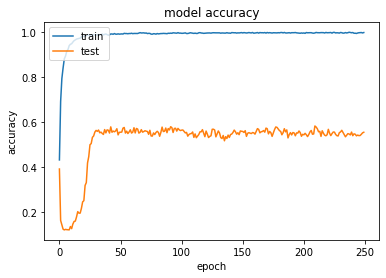

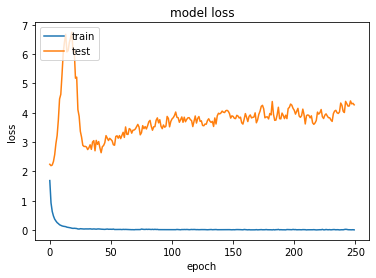

In [30]:
# summarize history for accuracy
plt.plot(model_all.history['accuracy'])
plt.plot(model_all.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_all.history['loss'])
plt.plot(model_all.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
train_hist = pd.DataFrame(model_all.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,1.688273,0.432541,2.244169,0.392157
1,0.924982,0.692598,2.196457,0.163950
2,0.634076,0.793065,2.219113,0.145523
3,0.479181,0.840187,2.340441,0.125443
4,0.373197,0.880640,2.570283,0.122136
...,...,...,...,...
245,0.011149,0.996444,4.232310,0.540279
246,0.008753,0.996888,4.404739,0.540751
247,0.008961,0.997333,4.304816,0.546185
248,0.012432,0.995555,4.323360,0.552563


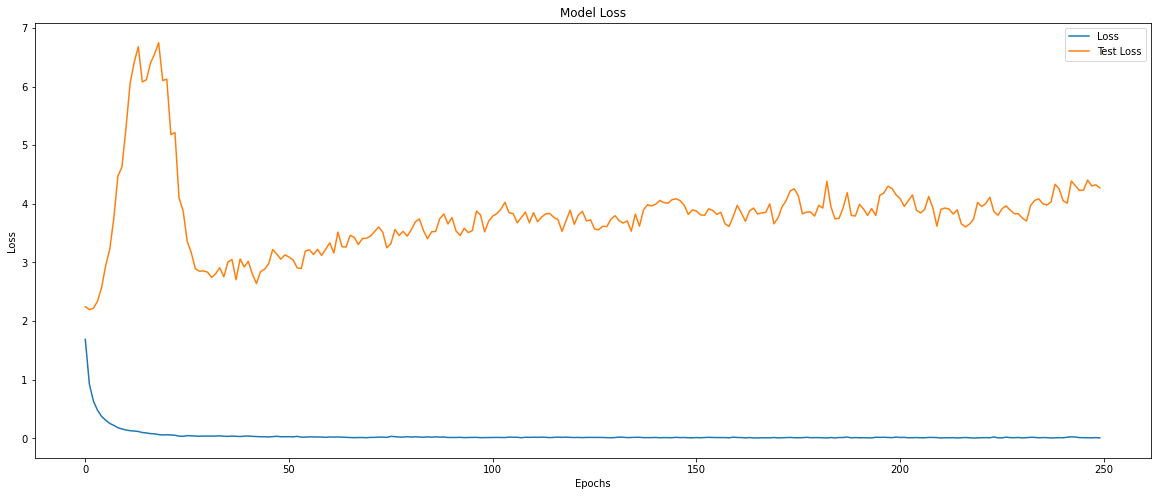

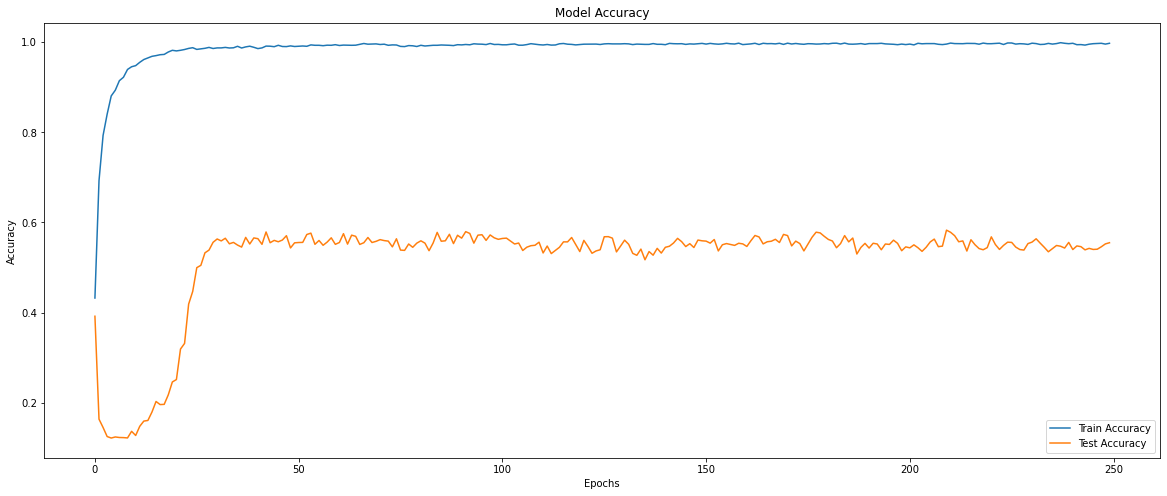

In [32]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [33]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[124  14  71  56  91  10   3  32  47  52]
 [  4 182   4   1   5   0   0   6   2  17]
 [ 11   8 302  31  15  13   6  16  49  49]
 [ 19   9  48 343   9   3  12   2  35  20]
 [  7   1  28  30 244   6   4 139  15  26]
 [ 56  10  25  31  59 196   0  20  70  16]
 [  3   2   9  10   1   5 142   1   1  10]
 [  9  16   0   1 204   2   1 193  20   6]
 [  0   3  11  44   0  10   0   5 299  21]
 [  9  23  58  10  31   1   6  11  26 325]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.51      0.25      0.33       500
           1       0.68      0.82      0.74       221
           2       0.54      0.60      0.57       500
           3       0.62      0.69      0.65       500
           4       0.37      0.49      0.42       500
           5       0.80      0.41      0.54       483
           6       0.82      0.77      0.79       184
           7       0.45      0.43      0.44       452
           8       0.53      0.